<h1>Data Visualisation of Finacial services use in Tanzania</h1>
<h5>Author: kevin Mntambo</h5>
<b>Description:</b>We look at the at the use of financial services in Tanzania, whereby we use graphs to better visualize and understand how factors like gender, age, marital status, land ownership , types of income and geographic location can affect how an individual accesses these services.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from mpl_toolkits.basemap import Basemap

mobile_money_df = pd.read_csv('../data/training.csv')
print(mobile_money_df.shape)
mobile_money_df.head()


(7094, 37)


,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


This data set is made up of 7094 rows and 37 columns.
From the snap shot of the data , nothing seems out of order, everything seems to be in place.


In [3]:
mobile_money_df.isnull().sum()

ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                            0
Latitude  

There are no missing values.

In [4]:

#checking how manny unique id we have incase some are repeating.
print(mobile_money_df['ID'].unique().size)

7094


There are no repeating entries. All entries have a unique ID.

In [5]:
maximum = mobile_money_df.max()
minimum = mobile_money_df.min()
tdict = {
    "Q2": (1,2),
    "Q3": (1,4),
    "Q5": (1,6),
    "Q16": (-1,5),
    "mobile_money_classification": (0,3),
    

}
for i in range(1,12):
    tdict[f'Q8_{i}'] = (0,1)
    
for index, value in minimum.items():
    for key, item in tdict.items():
        if (index == key) & (value < item[0]):
            print(f'Error,some  value(s) in the {index} column are below the minimum value.')
        
for index, value in maximum.items():
    for key, item in tdict.items():
        if (index == key)&(value > item[1]):
            print(f'Error,some  value(s) in the{index}column are over the maximum value.')


Checked some of the key columns, all them  seem valid. all of them have values below or equal the maximum and above or equal to the minimum value assigned to that question.

In [6]:
mobile_money_df=mobile_money_df.rename(columns={"Q1": "Age", "Q2": "Gender","Q3":"Marital status", "Q4":"Highest level of education","Q5":"land ownership status","Q16":"frequency_of_mobile_money_use"})

money_classification= {0:"no services",1:"financial service(s) except mobile money ",2:" mobile money only",3:"mobile money & other service(s)"}
money_usage= {1:"Never",2:"Daily",3:"Weekly",4:"Monthly",5:"Less  than a month"}

gender = {1: "male ", 2: "female"}
marital_status = {1: "maried ", 2: "devorced",3:"widowed", 4:"single"}
land_ownership = {1: "personally own land you live in", 2: "You own land with someone",3:"household member owns land", 4:"Rent land",5:"don’t own or rent land",6:"Don’t know"}
income_type = ['Selling goods','Providing services','Casual Labor','Rental income','investments',' Government grant', 'Rely on someone else','Don’t get money','Others','Salaries']


Renamed some of the columns,for ease of use and readability.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

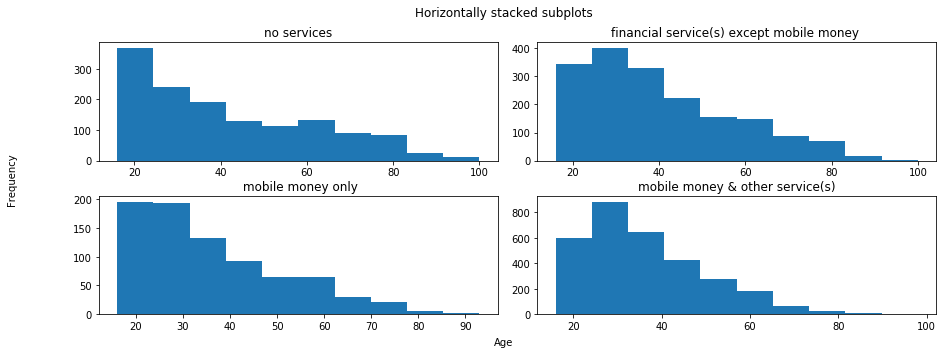

In [7]:
mobile_money_groups=mobile_money_df.groupby("mobile_money_classification")

fig,ax = plt.subplots(2, 2,figsize=(15,5),gridspec_kw={'hspace': 0.3,'wspace': 0.1})
fig.suptitle('Horizontally stacked subplots')
fig.text(0.5, 0.04, 'Age', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

for k in range(0,2):
    for i in range(0,2):
        ax[k,i].hist(mobile_money_groups.get_group(2*k+i).Age)
        ax[k,i].set_title(money_classification[2*k+i])
plt.plot



All the above graphs are positively skewed ,this suggests that  the general population ,of Tanzania is fairly young with most people more likey to fall under the ages of 20-40.The graphs have different volumes, more people in general use mobile and other financial services whilst very few people use mobile money only.
 
The distrubutions of the graphs also  slighty vary, the graph of people who don't use any finacial services (no services)seem to be more evenely distributed than the graphs of those who use mobile money only and those who use mobile money & other services, this may  suggest that, predominently, the key market for mobile money services is  the youth. 

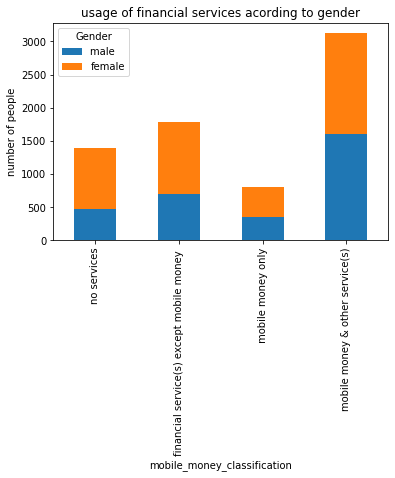

In [8]:
import matplotlib.pyplot as plot


mobile_money = mobile_money_df.groupby(['mobile_money_classification','Gender']).mobile_money_classification.count()

mobile_money.to_frame()
mobile_money = mobile_money.unstack()
mobile_money = mobile_money.rename(columns=gender,index=money_classification)
mobile_money.plot.bar(stacked=True,rot=90, title='usage of financial services acording to gender');
plot.ylabel('number of people')
plot.show(block=True);



This graph suggests that there is no significant difference between the number of men and women who use mobile money only and mobile and other services. However, it does suggest that more women don't use any financial services than men and also that more women use other financial services except mobile money than men.

This might suggest, that there may be a bigger market of women to possibly bring on board, into using mobile money.

Text(0, 0.5, 'number of people')

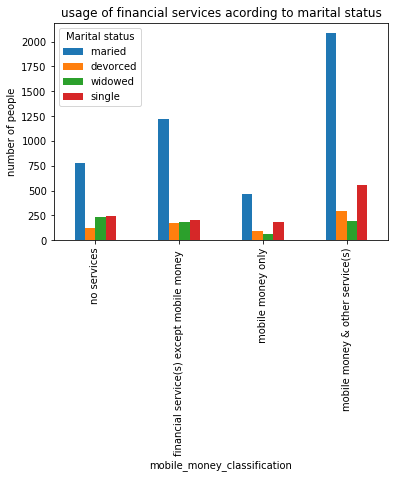

In [9]:

mobile_money = mobile_money_df.groupby(['mobile_money_classification','Marital status']).mobile_money_classification.count()

mobile_money.to_frame()
mobile_money = mobile_money.unstack()

mobile_money = mobile_money.rename(columns=marital_status,index=money_classification)

mobile_money.plot.bar(rot=90, title='usage of financial services acording to marital status')
plt.ylabel('number of people')

We observe that a far greater number of married people make use of financial services than any other demographic, with the widowed population being the smallest group of people who use financial services as a whole. This might suggest that the key demographic in this set is married people , targeting maried people would yeild the most expediant results.


Text(0, 0.5, 'number of people')

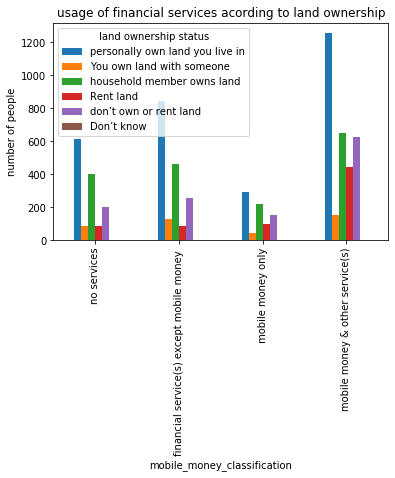

In [10]:
mobil_money = mobile_money_df.groupby(['mobile_money_classification','land ownership status']).mobile_money_classification.count()

mobil_money.to_frame()
mobil_money = mobil_money.unstack()

mobil_money = mobil_money.rename(columns=land_ownership,index=money_classification)


mobil_money.plot.bar(rot=90, title='usage of financial services acording to land ownership')
plt.ylabel('number of people')


Most people own the land they live in, but also more comonly people live in land a household member owns or niether own or rent.Those who have any finacial sevices are more likely to have both mobile money along with other finacial services. The finacial sector according to this graph may thefore gain more potent resualts by focusing on catering to people who own land.




([<matplotlib.axis.XTick at 0x7f3b61dda9d0>,
 <a list of 10 Text xticklabel objects>)

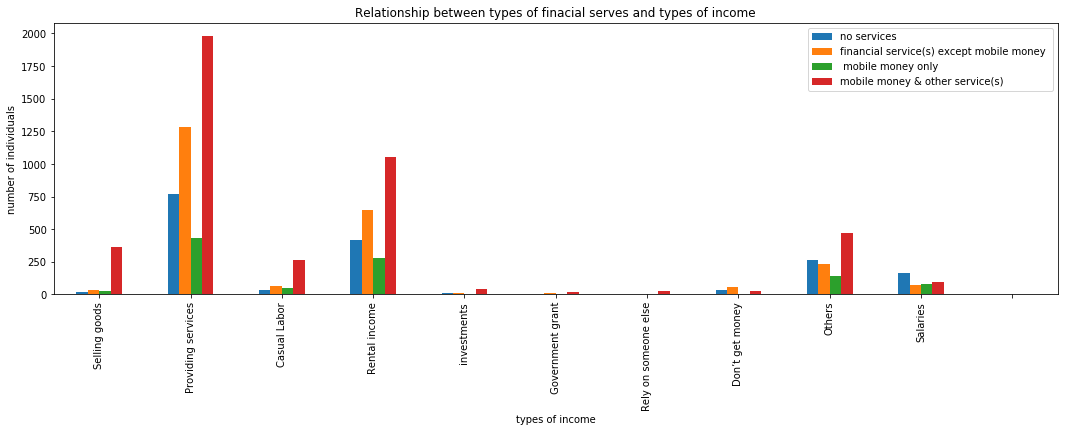

In [11]:
finService_by_income= mobile_money_groups.sum().loc[:,'Q8_1':'Q8_11'].T.rename(columns=money_classification)
    
finService_by_income.plot.bar(figsize=(18,5))
    

N = 11
ind = np.arange(N) 
plt.legend()
plt.xlabel('types of income')
plt.ylabel('number of individuals')
plt.title('Relationship between types of finacial serves and types of income')
plt.xticks(ind,income_type,rotation = 90)


    
    


This graph  suggests that the people in Tanzania do not receive money in the traditionally popular ways, like salaries and investments and goverment grants, according to Alan Cole, an economist from Tax Foundation, Wages and Salaries make Up 68 Percent of Total Income at 6.3 Trillion dollars in the USA (A. Cole, 2015). Tanzania seems to have a entrepreneurial-based economy, people provide services, sell goods and do casual labour. Perhaps the financial sector can look in to creating services for entrapreneurs as traditional bank services may not be best suited for them.

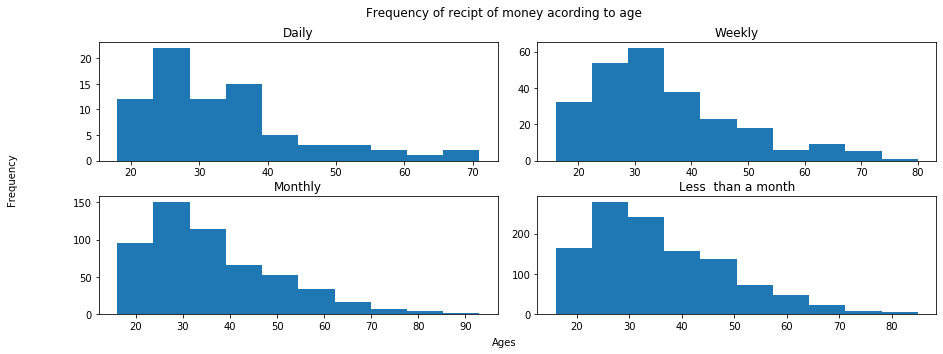

In [12]:

frequency_use=mobile_money_df.groupby("frequency_of_mobile_money_use")

fig, ax = plt.subplots(2, 2,figsize=(15,5),gridspec_kw={'hspace': 0.3,'wspace': 0.1})
fig.suptitle('Frequency of recipt of money acording to age')



fig.text(0.5, 0.04, 'Ages', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

for k in range(0,2):
    for i in range(2,4):
        ax[k,i-2].hist(frequency_use.get_group(2*k+i).Age)
        ax[k,i-2].set_title(money_usage[2*k+i])





All the above graphs are positively skewed with no visible outliers. This sugests that the general population is relatively young.The graphs gradually increase in volume, the less commonly that group of people use mobile money. This is not ideal for any service one would want to help people, in this case predominantly the youth, to use the service more often than not.

Text(0, 0.5, 'number of people')

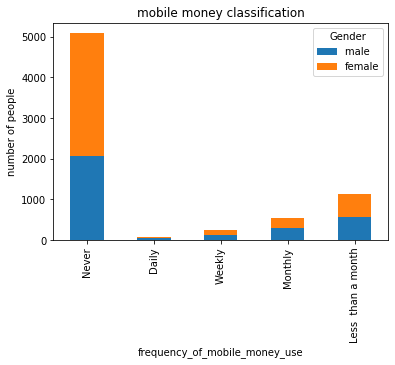

In [13]:
freq_of_use_by_gender = mobile_money_df.groupby(['frequency_of_mobile_money_use','Gender']).frequency_of_mobile_money_use.count()
freq_of_use_by_gender.to_frame()
freq_of_use_by_gender_df= freq_of_use_by_gender.unstack()

freq_of_use_by_gender_df = freq_of_use_by_gender_df.rename(columns=gender,index=money_usage)

freq_of_use_by_gender_df.plot.bar(stacked=True,rot=90, title='mobile money classification');
plt.ylabel('number of people')

Men and women seem to use mobile money about the same amount throughout the different time intervals, however, the amount of women who have never used the mobile money service seem to be much more than men.
This suggests that there might greater difficulty for women to be introduced to mobile money, in other words there is an opportunity to greater facilitate more women getting to use mobile money.

Text(0, 0.5, 'number of people')

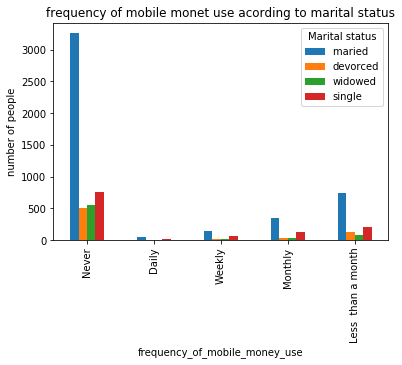

In [14]:
frequency_by_marital = mobile_money_df.groupby(['frequency_of_mobile_money_use','Marital status']).mobile_money_classification.count()

frequency_by_marital.to_frame()
frequency_by_marital = frequency_by_marital.unstack()

frequency_by_marital = frequency_by_marital.rename(columns=marital_status,index=money_usage)

frequency_by_marital.plot.bar(rot=90, title='frequency of mobile monet use acording to marital status')
plt.ylabel('number of people')

This graph suggests that, more married people make use of financial services than any other demographic, with single people following and the widowed population making use of these services the least. 
There is generally a lot of people who have never used mobile money before however this graph may suggests that the financial sector would have to focus primarly on married people to gain the most results.

Text(0, 0.5, 'number of people')

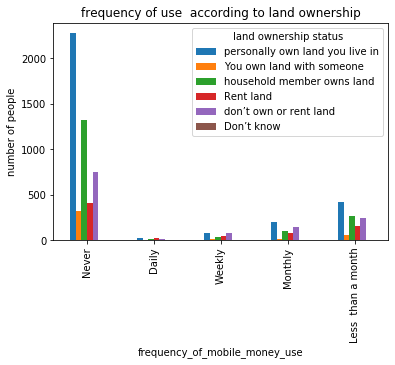

In [15]:
frequancy_by_land_ownership= mobile_money_df.groupby(['frequency_of_mobile_money_use','land ownership status']).mobile_money_classification.count()

frequancy_by_land_ownership.to_frame()
frequancy_by_land_ownership = frequancy_by_land_ownership.unstack()

frequancy_by_land_ownership = frequancy_by_land_ownership.rename(columns=land_ownership,index=money_usage)

frequancy_by_land_ownership.plot.bar(rot=90, title='frequency of use  according to land ownership')
plt.ylabel('number of people')

The graph suggests that most people have never used mobile money,in general could benefit from getting more people into using the mobile money more frequently. particularly targeting people who personally own land ,those whom have a household  member owns land and those who don't own land or rent could yeild the most benefits.

Text(0.5, 0, 'types of income')

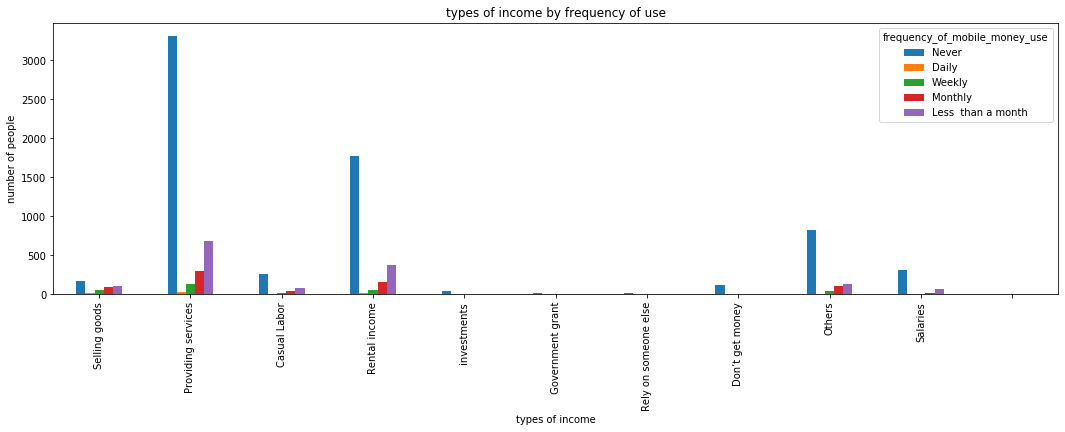

In [16]:

frequency_use_by_income = frequency_use.sum().loc[:,'Q8_1':'Q8_11'].T.rename(columns=money_usage)
    
frequency_use_by_income.plot.bar(figsize=(18,5), title='types of income by frequency of use')

plt.xticks(ind, income_type,rotation = 90)
plt.ylabel('number of people')
plt.xlabel('types of income')

People who receive an income by selling goods, performing casual labour, or relying on someone else generally make use of financial services more frequently than others. We can also see that, typically, those who receive daily incomes are the least likely to make use of financial services, with those who receive an income less than once a month follow, with the second lowest use of financial services. People who receive monthly incomes are the most likely to use financial services.

This graph is potentially showing a huge opportunity to capture the the large number of people who have reported to have never used mobile money, particularly those who provide services and get money through rental income seem the most profitable to go after, but acoss the board an opportunity to introduce more poeple to mobile money.

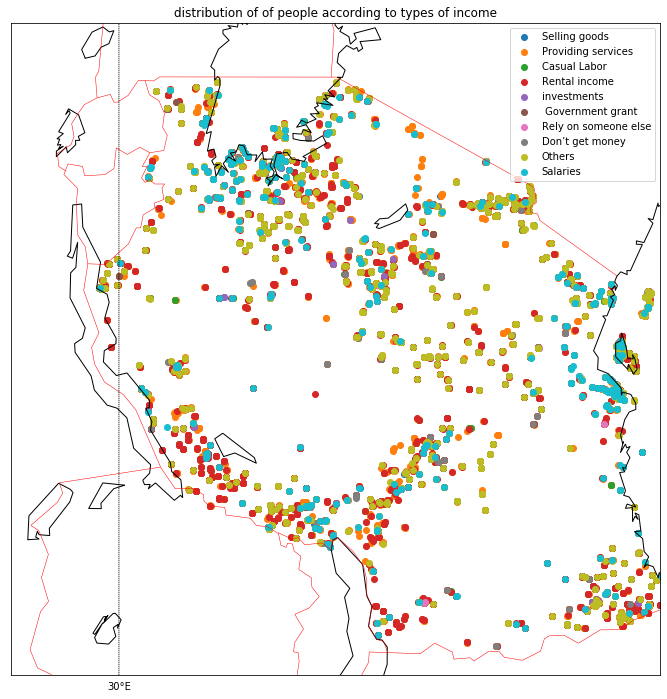

In [20]:
fig = plt.figure(figsize=(12,12))
m = Basemap(projection='mill',
           llcrnrlat=-12,
           urcrnrlat=0,
           llcrnrlon=28,
           urcrnrlon=40,
           width = 10000000,
           height =10000000,
           resolution='l')
m.drawcoastlines()
m.drawcountries(color="red")
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

lats= []
lon =[]
for i in range(1,12):
    lon.append((mobile_money_df.loc[mobile_money_df[f'Q8_{i}']==1])['Longitude'].tolist())
    lats.append((mobile_money_df.loc[mobile_money_df[f'Q8_{i}']==1])['Latitude'].tolist())
    
for k in range(0,10):
    m.scatter(lon[k],lats[k],latlon=True,label = income_type[k])
plt.title('distribution of of people according to types of income')
plt.legend()

The most pronounced colors or most participants seem to get money through casual labour, salary and rental income.Most people seem to come  from the edges of the country, this contradicts what we have found in the past , with one of the main sources of income being providing services, however it might be that on the map it not sure becuase these people live with other houshold members who get money by other means.

# conclusion
Most people who use have mobile service seem to only have  with  other sevices most likely as an extra, not a lot of people  just have mobile service alone. this could explain why most people who have mobile service,  have either never use it before or  rather use it fairly scarcly.

#### some key demographics: 
woman , married, land owners, ages 20 - 40,makes a living by providing services.

##### seems to be two issues 
First, a significant number of people do not have any financial sevices at all , they seem to be more likely a  woman.
The secound issue is that those who have  mobile money sevices have never or have seldom used it
before.These people are more likely to be  married, land owners, ages 20 - 40 and make a living by providing services.